In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv("intern_public_dataset_2022/df_train_20220802.csv", low_memory=False)
df_rt = pd.read_csv("intern_public_dataset_2022/df_rt_20220802.csv", low_memory=False)
df_test_unlabeled = pd.read_csv("intern_public_dataset_2022/df_test_unlabeled_20220802.csv", low_memory=False)
df["request_time"] = pd.to_datetime(df["request_time"])
df_test_unlabeled["request_time"] = pd.to_datetime(df_test_unlabeled["request_time"])
df_rt["request_time"] = pd.to_datetime(df_rt["request_time"])
df

,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,Windows,0,0,3.0,0,0,0,aichi,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,iOS,1,1,NaN,1,1,1,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,iOS,1,2,NaN,1,1,2,osaka,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,Windows,2,3,NaN,2,2,3,tokyo,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,Android,3,4,NaN,3,3,4,tokyo,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,Android,158132,979,NaN,8,8,118,miyazaki,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,Android,164623,225,3.0,7,7,35,tokyo,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,iOS,3054,2,NaN,2,2,708,kagoshima,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,Android,53986,6,1.0,17,17,491,osaka,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


In [2]:
dic_osid = []
dic_region= []
encode_cols = ['os_id','region']
for c in encode_cols:
    if c == 'os_id':
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_osid = obj
    else:
        env,obj = pd.factorize(df[c],sort=True)
        df[c] = env
        dic_region = obj
print(dic_osid)
print(dic_region)
df

Index(['Android', 'Mac', 'Windows', 'iOS'], dtype='object')
Index(['aichi', 'akita', 'aomori', 'chiba', 'ehime', 'fukui', 'fukuoka',
       'fukushima', 'gifu', 'gumma', 'hiroshima', 'hokkaido', 'hyogo',
       'ibaraki', 'ishikawa', 'iwate', 'kagawa', 'kagoshima', 'kanagawa',
       'kochi', 'kumamoto', 'kyoto', 'mie', 'miyagi', 'miyazaki', 'nagano',
       'nagasaki', 'nara', 'niigata', 'oita', 'okayama', 'okinawa', 'osaka',
       'saga', 'saitama', 'shiga', 'shimane', 'shizuoka', 'tochigi',
       'tokushima', 'tokyo', 'tottori', 'toyama', 'wakayama', 'yamagata',
       'yamaguchi', 'yamanashi'],
      dtype='object')


,req_id,request_time,os_id,ssp_uid,slot_id,n_slot_position,sponsor_id,campaign_id,creative_id,region,...,prob_man,sponsor_fq,sponsor_inview_fq,sponsor_recency,sponsor_inview_recency,click_time,cv_time,click_flg,cv_flg,site_id
0,0,2022-06-14 15:00:07+00:00,2,0,0,3.0,0,0,0,0,...,0.985029,6,5,370,410,NaN,NaN,0,0,0
1,1,2022-06-14 15:00:07+00:00,3,1,1,NaN,1,1,1,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
2,2,2022-06-14 15:00:07+00:00,3,1,2,NaN,1,1,2,32,...,NaN,0,0,-1,-1,NaN,NaN,0,0,1
3,3,2022-06-14 15:00:08+00:00,2,2,3,NaN,2,2,3,40,...,NaN,5,2,5,2,NaN,NaN,0,0,2
4,4,2022-06-14 15:00:09+00:00,0,3,4,NaN,3,3,4,40,...,NaN,0,0,-1,-1,NaN,NaN,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038562,5038562,2022-07-26 14:59:52+00:00,0,158132,979,NaN,8,8,118,24,...,NaN,8,1,145,15356,NaN,NaN,0,0,11
5038563,5038563,2022-07-26 14:59:55+00:00,0,164623,225,3.0,7,7,35,40,...,NaN,2,0,37590,-1,NaN,NaN,0,0,31
5038564,5038564,2022-07-26 14:59:57+00:00,3,3054,2,NaN,2,2,708,17,...,NaN,3,1,219,308,NaN,NaN,0,0,1
5038565,5038565,2022-07-26 14:59:57+00:00,0,53986,6,1.0,17,17,491,32,...,NaN,1,0,5,-1,NaN,NaN,0,0,5


In [30]:
5038567*21

105809907

In [29]:
tmp = 0
for col in df.columns:
    filt = pd.isna(df[col])
    tmp += filt.sum()
    # print(filt.sum())
tmp


19296196

In [31]:
19296196/105809907

0.18236662848593185

In [3]:
df = df.fillna(df.mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [4]:
df.dropna(axis=1,how='any',inplace=True)

In [6]:
df['request_time']=pd.to_datetime(df['request_time'])
new = pd.DataFrame((df.groupby([(df['request_time'].dt.month),(df['request_time'].dt.day)])["click_flg"].sum())/(df.groupby([(df['request_time'].dt.month),(df['request_time'].dt.day)])["click_flg"].size()))


In [5]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import time

In [9]:
df['click_flg'].value_counts()

0    4989282
1      49285
Name: click_flg, dtype: int64

In [6]:
X = df.drop(['click_flg','request_time','cv_flg'], axis=1)
Y = df['click_flg']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0, stratify=Y)

In [13]:
len(X_train.columns)

16

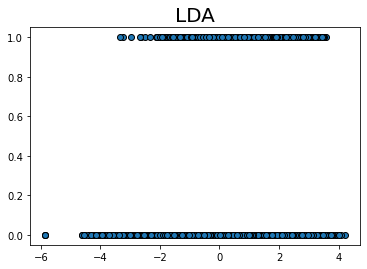

In [45]:
#LDA



clf = LinearDiscriminantAnalysis(n_components=1)
time_start_train = time.time()
clf.fit(X_train,Y_train)
X_train_transformed = clf.transform(X_train)
# X_train_transformed

plt.figure(figsize=(13, 4))
plt.subplot(121)
plt.scatter(X_train_transformed[:, 0],
            Y_train, cmap='viridis', edgecolor='blacK')
plt.title('LDA', fontsize=20)
plt.show()

# time_end_train = time.time()
# times_train=(time_end_train-time_start_train)

# time_start_pre = time.time()
# predicted = clf.predict_proba(X_test)
# time_end_pre = time.time()
# times_pre = time_end_pre-time_start_pre

# ROC_AUC_SCORE = roc_auc_score(Y_test,predicted[:,-1])




# score = accuracy_score(predicted, Y_test)
# print('Accuracy: ' + str(score))

In [9]:
print(times_train)
print(times_pre)
print(ROC_AUC_SCORE)

10.30564022064209
0.2212681770324707
0.7825306111111903


In [8]:
#PCA
from sklearn.decomposition import PCA
import lightgbm as lgb


dims = [8,9,10,11,12,13]
times_train = []
times_pre = []
ROC_AUC_SCORE = []

for dim in dims:
    X_train_tmp = X_train
    X_test_tmp = X_test
    
    clf = PCA(n_components=dim)
    
    clf.fit(X_train_tmp)
    
    
    
    X_train_tmp = clf.transform(X_train_tmp)
    clf.fit(X_test_tmp)
    X_test_tmp = clf.transform(X_test_tmp)
    
    time_start_train = time.time()
    model = lgb.LGBMClassifier()
    model.fit(X_train_tmp,Y_train)
    time_end_train = time.time()
    times_train.append(time_end_train-time_start_train)
    
   

    time_start_pre = time.time()
    predicted = model.predict_proba(X_test_tmp)
    time_end_pre = time.time()
    times_pre.append(time_end_pre - time_start_pre)
    ROC_AUC_SCORE.append(roc_auc_score(Y_test,predicted[:,-1]))




# score = accuracy_score(predicted, Y_test)
# print('Accuracy: ' + str(score))

In [9]:
times_train

[28.347519636154175,
 27.191433906555176,
 32.407042026519775,
 31.246403217315674,
 36.6754469871521,
 35.25782632827759]

In [10]:
times_pre

[4.83068060874939,
 4.860852241516113,
 5.219556570053101,
 5.276562213897705,
 5.5862836837768555,
 5.1149561405181885]

In [36]:
ROC_AUC_SCORE

[0.782706257068181,
 0.7806396840187928,
 0.8052609890248731,
 0.809085210291301,
 0.8106495657740069,
 0.8309395690511109]

Text(0.5, 1.0, 'Times to predict')

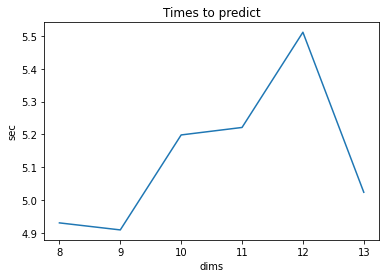

In [37]:
fig,ax=plt.subplots()
x = dims
y1 = times_train
y2 = times_pre
# ax.plot(x,y1,label='times_train')
ax.plot(x,y2,label='times_pre')
ax.set_xlabel('dims')
ax.set_ylabel('sec')
ax.set_title('Times to predict')

Text(0.5, 1.0, 'Times to train')

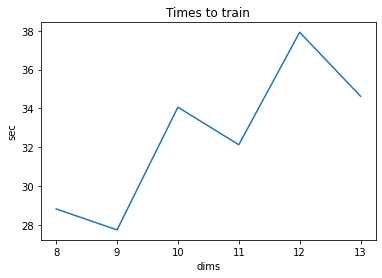

In [38]:
fig,ax=plt.subplots()
x = dims
y1 = times_train
y2 = times_pre
# ax.plot(x,y1,label='times_train')
ax.plot(x,y1)
ax.set_xlabel('dims')
ax.set_ylabel('sec')
ax.set_title('Times to train')

Text(0.5, 1.0, 'ROC_AUC_SCORE')

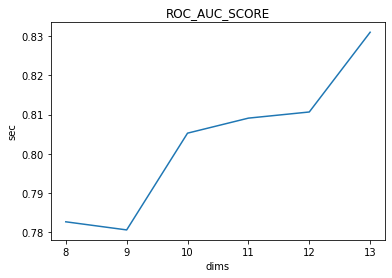

In [39]:
fig,ax=plt.subplots()
x = dims
y = ROC_AUC_SCORE
ax.plot(x,y)
ax.set_xlabel('dims')
ax.set_ylabel('sec')
ax.set_title('ROC_AUC_SCORE')

In [67]:
print(predicted)
print(type(predicted))
print(predicted.shape)

[[0.90157124 0.09842876]
 [0.98885761 0.01114239]
 [0.99469979 0.00530021]
 ...
 [0.99617821 0.00382179]
 [0.99678786 0.00321214]
 [0.99451624 0.00548376]]
<class 'numpy.ndarray'>
(1511571, 2)


In [68]:
print(roc_auc_score(Y_test,predicted[:,-1]))

0.7832853557926626


In [57]:
c = np.array( [[0.99668769,0.00331231],
               [0.99856382,0.00143618]])
print(c[:,-1])

[0.00331231 0.00143618]


In [13]:
#lightGBM
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train,Y_train)
Y_pre = model.predict_proba(X_test)
print(Y_pre)

[[0.95533985 0.04466015]
 [0.99542481 0.00457519]
 [0.99563118 0.00436882]
 ...
 [0.99863172 0.00136828]
 [0.98520957 0.01479043]
 [0.9974734  0.0025266 ]]


In [2]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.7 MB/s eta 0:00:0000:010:01


In [14]:
print(roc_auc_score(Y_test,Y_pre[:,-1]))

0.8771437036145584
